In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
)

In [2]:
# from https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied
df = pd.read_csv("data/SBAnational.csv")
df.head()

/var/folders/v1/_044sdz57w31hjpd502812fm0000gn/T/ipykernel_98209/2902579612.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/SBAnational.csv")


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


| Variable Name     | Description                                              |
| ----------------- | -------------------------------------------------------- |
| LoanNr_ChkDgt     | Identifier Primary key                                   |
| Name              | Borrower name                                            |
| City              | Borrower city                                            |
| State             | Borrower state                                           |
| Zip               | Borrower zip code                                        |
| Bank              | Bank name                                                |
| BankState         | Bank state                                               |
| NAICS             | North American industry classification system code       |
| ApprovalDate      | Date SBA commitment issued                               |
| ApprovalFY        | Fiscal year of commitment                                |
| Term              | Loan term in months                                      |
| NoEmp             | Number of business employees                             |
| NewExist          | 1 = Existing business, 2 = New business                  |
| CreateJob         | Number of jobs created                                   |
| RetainedJob       | Number of jobs retained                                  |
| FranchiseCode     | Franchise code, (00000 or 00001) = No franchise          |
| UrbanRural        | 1 = Urban, 2 = rural, 0 = undefined                      |
| RevLineCr         | Revolving line of credit: Y = Yes, N = No                |
| LowDoc            | LowDoc Loan Program: Y = Yes, N = No                     |
| ChgOffDate        | The date when a loan is declared to be in default        |
| DisbursementDate  | Disbursement date                                        |
| DisbursementGross | Amount disbursed                                         |
| BalanceGross      | Gross amount outstanding                                 |
| MIS_Status        | "CHGOFF" = Loan status charged off, "PIF" = Paid in full |
| ChgOffPrinGr      | Charged-off amount                                       |
| GrAppv            | Gross amount of loan approved by bank                    |
| SBA_Appv          | SBA’s guaranteed amount of approved loan                 |


In [3]:
df.drop(df[df["MIS_Status"].isnull()].index, axis=0, inplace=True)

In [4]:
useless_cols = [
    "LoanNr_ChkDgt",
    "Name",
    "Zip",
    "ApprovalDate",
    "ApprovalFY",
    "ChgOffDate",
    "DisbursementDate",
    "DisbursementGross",
    "BalanceGross",
    "ChgOffPrinGr",
    "GrAppv",
    "SBA_Appv",
]
df.drop(columns=useless_cols, axis=1, inplace=True)

# Исследование данных


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897167 entries, 0 to 899163
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           897137 non-null  object 
 1   State          897154 non-null  object 
 2   Bank           895661 non-null  object 
 3   BankState      895654 non-null  object 
 4   NAICS          897167 non-null  int64  
 5   Term           897167 non-null  int64  
 6   NoEmp          897167 non-null  int64  
 7   NewExist       897033 non-null  float64
 8   CreateJob      897167 non-null  int64  
 9   RetainedJob    897167 non-null  int64  
 10  FranchiseCode  897167 non-null  int64  
 11  UrbanRural     897167 non-null  int64  
 12  RevLineCr      892647 non-null  object 
 13  LowDoc         894589 non-null  object 
 14  MIS_Status     897167 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 109.5+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NAICS,897167.0,398541.853498,263359.727579,0.0,235210.0,445310.0,561730.0,928120.0
Term,897167.0,110.848592,78.900862,0.0,60.0,84.0,120.0,569.0
NoEmp,897167.0,11.412562,73.793775,0.0,2.0,4.0,10.0,9999.0
NewExist,897033.0,1.280403,0.451741,0.0,1.0,1.0,2.0,2.0
CreateJob,897167.0,8.444305,236.950249,0.0,0.0,0.0,1.0,8800.0
RetainedJob,897167.0,10.807308,237.382398,0.0,0.0,1.0,4.0,9500.0
FranchiseCode,897167.0,2757.528287,12767.025962,0.0,1.0,1.0,1.0,99999.0
UrbanRural,897167.0,0.757274,0.646540,0.0,0.0,1.0,1.0,2.0


In [7]:
df["NewExist"].value_counts()

NewExist
1.0    643446
2.0    252559
0.0      1028
Name: count, dtype: int64

In [8]:
df["UrbanRural"].value_counts()

UrbanRural
1    469281
0    322826
2    105060
Name: count, dtype: int64

In [9]:
df["FranchiseCode"].value_counts()

FranchiseCode
1        637395
0        208040
78760      3373
68020      1921
50564      1034
          ...  
24421         1
61615         1
81580         1
83876         1
15930         1
Name: count, Length: 2767, dtype: int64

In [10]:
df.describe(include="object").T

,count,unique,top,freq
City,897137,32566,LOS ANGELES,11550
State,897154,51,CA,130488
Bank,895661,5801,BANK OF AMERICA NATL ASSOC,86773
BankState,895654,56,CA,118034
RevLineCr,892647,18,N,419252
LowDoc,894589,8,N,780997
MIS_Status,897167,2,P I F,739609


In [11]:
US_STATES = set(
    [
        "AL",
        "AK",
        "AZ",
        "AR",
        "CA",
        "CO",
        "CT",
        "DC",
        "DE",
        "FL",
        "GA",
        "HI",
        "ID",
        "IL",
        "IN",
        "IA",
        "KS",
        "KY",
        "LA",
        "ME",
        "MD",
        "MA",
        "MI",
        "MN",
        "MS",
        "MO",
        "MT",
        "NE",
        "NV",
        "NH",
        "NJ",
        "NM",
        "NY",
        "NC",
        "ND",
        "OH",
        "OK",
        "OR",
        "PA",
        "RI",
        "SC",
        "SD",
        "TN",
        "TX",
        "UT",
        "VT",
        "VA",
        "WA",
        "WV",
        "WI",
        "WY",
    ]
)

In [12]:
set(df["State"].value_counts().index) - US_STATES

set()

In [13]:
invalid_bank_states = set(df["BankState"].value_counts().index) - US_STATES
invalid_bank_states

{'AN', 'EN', 'GU', 'PR', 'VI'}

In [14]:
df.isna().sum()

City               30
State              13
Bank             1506
BankState        1513
NAICS               0
Term                0
NoEmp               0
NewExist          134
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4520
LowDoc           2578
MIS_Status          0
dtype: int64

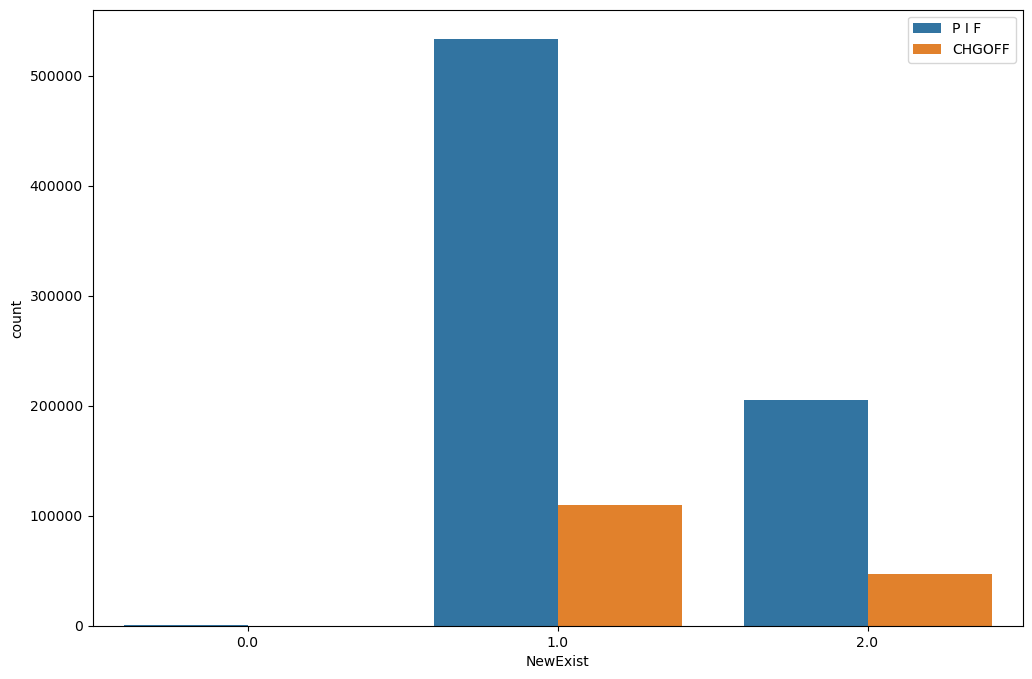

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(x="NewExist", hue="MIS_Status", data=df)
plt.legend()
plt.show()

In [16]:
df["RevLineCr"].value_counts()

RevLineCr
N    419252
0    257431
Y    200660
T     15239
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64

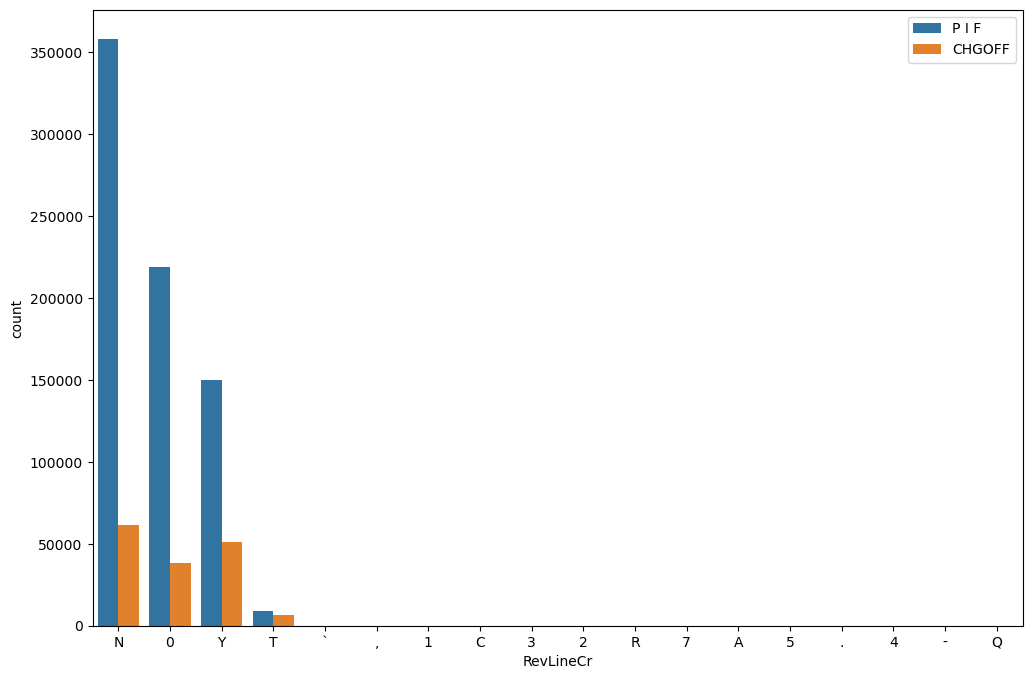

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(x="RevLineCr", hue="MIS_Status", data=df)
plt.legend()
plt.show()

In [18]:
df["LowDoc"].value_counts()

LowDoc
N    780997
Y    110171
0      1490
C       758
S       603
A       495
R        74
1         1
Name: count, dtype: int64

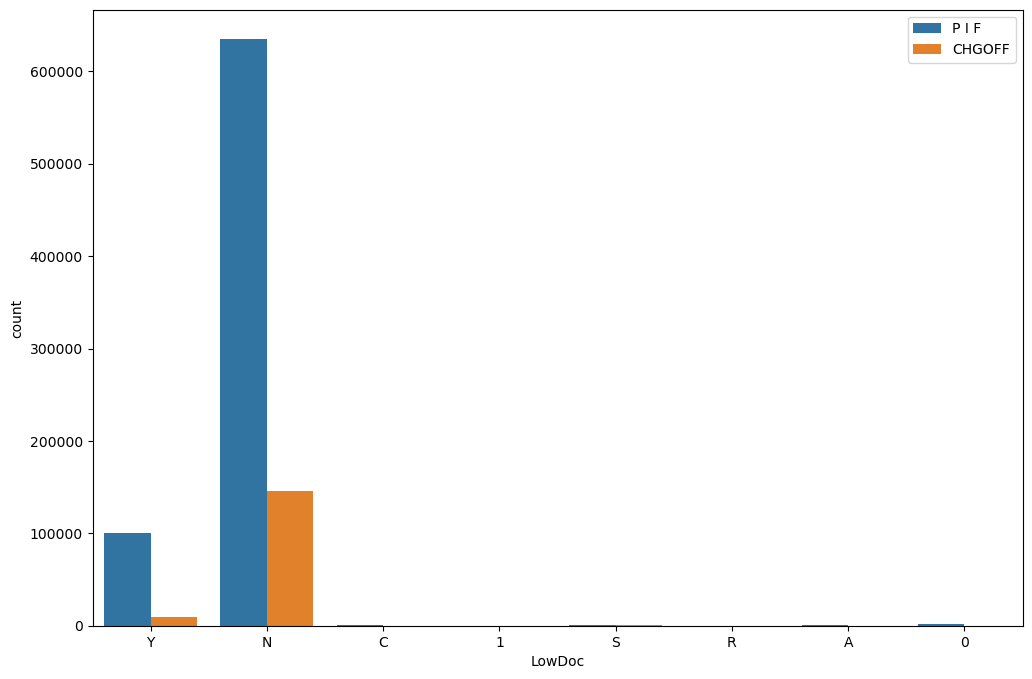

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(x="LowDoc", hue="MIS_Status", data=df)
plt.legend()
plt.show()

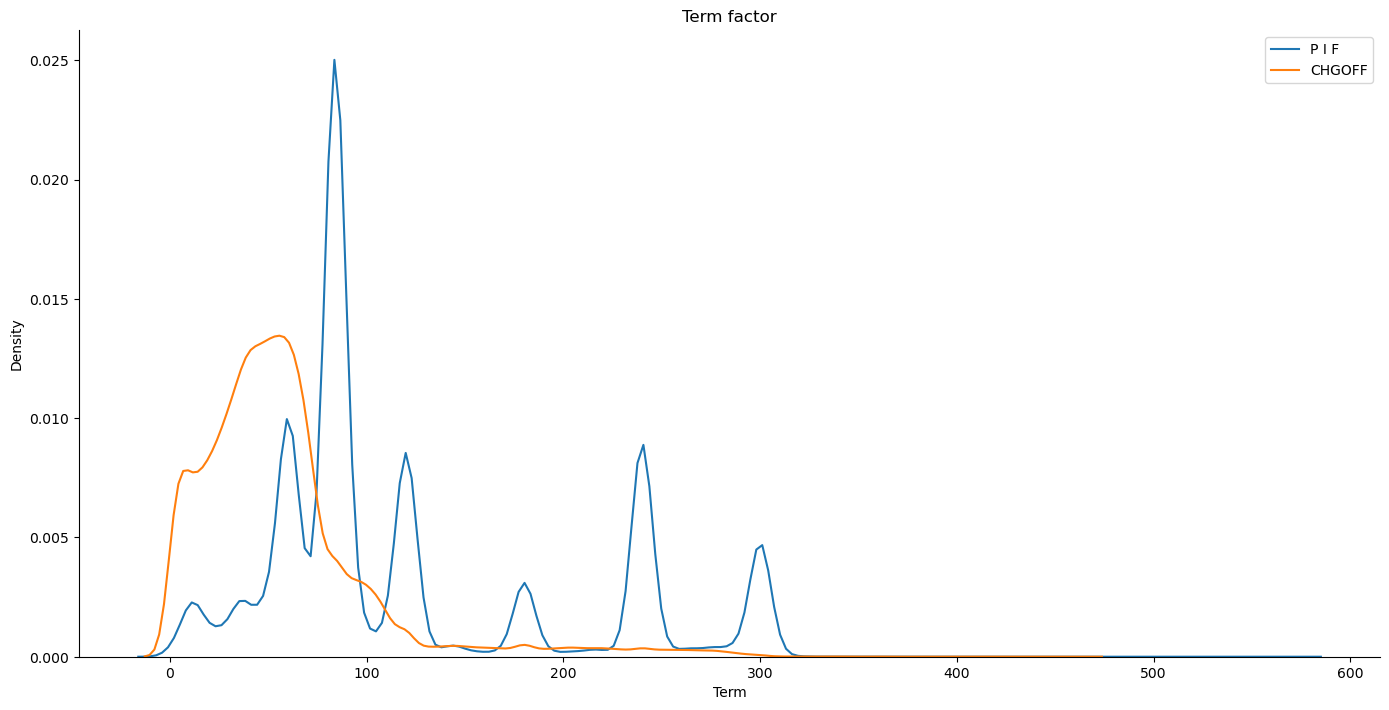

In [20]:
g = sns.FacetGrid(df, hue="MIS_Status", height=7, aspect=2)
g.map(sns.kdeplot, "Term")
plt.legend()
plt.title("Term factor")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/bda-kaggle/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


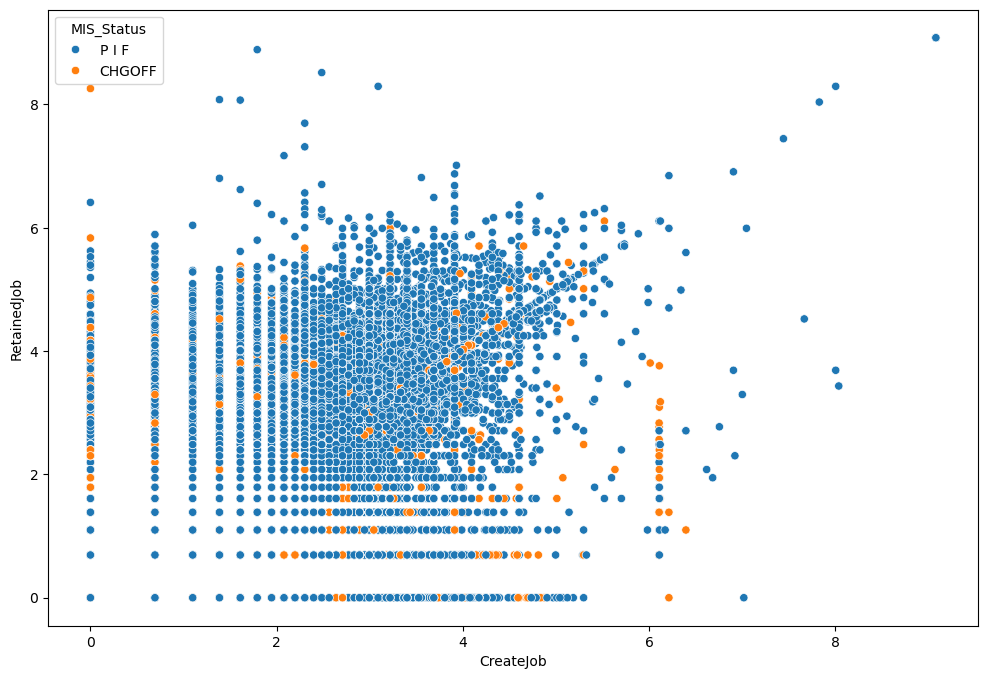

In [21]:
plt.figure(figsize=(12, 8))
job_survey_data = df[["CreateJob", "RetainedJob", "MIS_Status"]]
job_survey_data.loc[:, ["CreateJob", "RetainedJob"]] = np.log(
    job_survey_data[["CreateJob", "RetainedJob"]]
)
sns.scatterplot(data=job_survey_data, x="CreateJob", y="RetainedJob", hue="MIS_Status")
plt.show()
del job_survey_data

In [22]:
count = df["City"].value_counts()
print(f"Unique values: {len(count)}")
count_f = count[count > 500]
most_popular_cities = set(count_f.index)
print(f"Unique values after values grouped: {len(count_f)}")
count_f

Unique values: 32566
Unique values after values grouped: 270


City
LOS ANGELES         11550
HOUSTON             10229
NEW YORK             7834
CHICAGO              6009
MIAMI                5594
                    ...  
SANTA FE SPRINGS      510
IDAHO FALLS           509
KATY                  509
TRAVERSE CITY         507
FULLERTON             502
Name: count, Length: 270, dtype: int64

In [23]:
count = df["Bank"].value_counts()
print(f"Unique values: {len(count)}")
count_f = count[count > 500]
most_popular_banks = set(count_f.index)
print(f"Unique values after values grouped: {len(count_f)}")
count_f

Unique values: 5801
Unique values after values grouped: 196


Bank
BANK OF AMERICA NATL ASSOC        86773
WELLS FARGO BANK NATL ASSOC       63461
JPMORGAN CHASE BANK NATL ASSOC    48131
U.S. BANK NATIONAL ASSOCIATION    35112
CITIZENS BANK NATL ASSOC          33770
                                  ...  
NORTHWAY BANK                       515
COMMUNITYONE BANK NATL ASSOC        508
GOVERMNET FUNDING CALBIDCO          507
UNIVEST BANK AND TRUST CO.          505
WESBANCO BANK, INC.                 501
Name: count, Length: 196, dtype: int64

In [24]:
count = df["NAICS"].value_counts()
print(f"Unique values: {len(count)}")
# NAICS aggregation levels
# Digit | level
#  2 | Sector
#  3 | Subsector
#  4 | Industry group
#  5 | Industry
#  6 | National industry
naics_aggregation_level = 2
aggrd_counts = df["NAICS"].astype(str).str[:naics_aggregation_level].value_counts()
print(f"Unique values after values grouped: {len(aggrd_counts)}")
aggrd_counts

Unique values: 1312
Unique values after values grouped: 25


NAICS
0     201667
44     84567
81     72395
54     67922
72     67511
23     66492
62     55264
42     48673
45     42408
33     38206
56     32529
48     20198
32     17905
71     14616
53     13588
31     11792
51     11362
52      9470
11      8995
61      6401
49      2210
21      1851
22       662
55       256
92       227
Name: count, dtype: int64

# Обработка данных


In [25]:
def proc_col_City(val):
    if val in most_popular_cities:
        return val
    return "other city"


def proc_col_Bank(val):
    if val in most_popular_banks:
        return val
    return "other bank"


def proc_col_BankState(val):
    if val in invalid_bank_states:
        return None
    return val


def proc_col_NAICS(val):
    return "{:05d}".format(int(val))[:naics_aggregation_level]


def proc_col_NewExist(val):
    match val:
        case 1:
            return "exist"
        case 2:
            return "new"
        case _:
            return None


def proc_col_FranchiseCode(val):
    match val:
        case 0 | 1:
            return "no franchise"
        case _:
            return "some franchise"


def proc_col_UrbanRural(val):
    match int(val):
        case 1:
            return "urban"
        case 2:
            return "rural"
        case _:
            return "undefined"


def proc_col_RevLineCr(val):
    match str(val):
        case "Y" | "T":
            return "yes"
        case "N" | "0":
            return "no"
        case _:
            return None


def proc_col_LowDoc(val):
    match str(val):
        case "Y":
            return "yes"
        case "N":
            return "no"
        case _:
            return None


def proc_col_MIS_Status(val):
    if val == "CHGOFF":
        return 1
    elif val == "P I F":
        return 0
    else:
        raise ValueError("Incorrect MIS_Status value")


def pre_dumm_proc(df):
    df = df.copy()
    df.drop(columns=["City"], axis=1, inplace=True)
    # df["City"] = df["City"].apply(proc_col_City)
    df["Bank"] = df["Bank"].apply(proc_col_Bank)
    df["BankState"] = df["BankState"].apply(proc_col_BankState)
    df["NAICS"] = df["NAICS"].apply(proc_col_NAICS)
    df["NewExist"] = df["NewExist"].apply(proc_col_NewExist)
    df["FranchiseCode"] = df["FranchiseCode"].apply(proc_col_FranchiseCode)
    df["UrbanRural"] = df["UrbanRural"].apply(proc_col_UrbanRural)
    df["RevLineCr"] = df["RevLineCr"].apply(proc_col_RevLineCr)
    df["LowDoc"] = df["LowDoc"].apply(proc_col_LowDoc)
    df["MIS_Status"] = df["MIS_Status"].apply(proc_col_MIS_Status)
    df.dropna(inplace=True)
    return df


def dummify(df):
    df_dummies = pd.DataFrame()
    object_cols = df.columns[df.dtypes == object]
    for col in object_cols:
        df_dummies = pd.concat([df_dummies, create_dummy_col(df, col)], axis=1)
    df_out = pd.concat([df.drop(columns=object_cols), df_dummies], axis=1)
    return df_out.sort_index(ascending=False, axis=1)


def create_dummy_col(df, col):
    df_dummy = pd.get_dummies(df[col], drop_first=True)
    df_dummy.columns = [col + ": " + str(name) for name in df_dummy.columns]
    return df_dummy


df_predummy = pre_dumm_proc(df)
df_dummy = dummify(df_predummy)
df_dummy

,UrbanRural: urban,UrbanRural: undefined,Term,State: WY,State: WV,State: WI,State: WA,State: VT,State: VA,State: UT,...,Bank: BANCO POPULAR NORTH AMERICA,Bank: BANCFIRST,Bank: AURORA BANK FSB,Bank: ASSOCIATED BANK NATL ASSOC,Bank: ARVEST BANK,Bank: ANCHOR BANK NATL ASSOC,Bank: AMERICANWEST BANK,Bank: AMER NATL BK OF TEXAS,Bank: AMEGY BK NATL ASSOC,Bank: ALABAMA COMMUN DEVEL CORP
0,False,True,84,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,60,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,180,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,60,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,240,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,False,True,60,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
899160,False,True,60,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
899161,False,True,108,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
899162,False,True,60,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
df_predummy

,State,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status
0,IN,FIFTH THIRD BANK,OH,45,84,4,new,0,0,no franchise,undefined,no,yes,0
1,IN,1ST SOURCE BANK,IN,72,60,2,new,0,0,no franchise,undefined,no,yes,0
2,IN,other bank,IN,62,180,7,exist,0,0,no franchise,undefined,no,no,0
3,OK,other bank,OK,00,60,2,exist,0,0,no franchise,undefined,no,yes,0
4,FL,FLORIDA BUS. DEVEL CORP,FL,00,240,14,exist,7,7,no franchise,undefined,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,45,60,6,exist,0,0,no franchise,undefined,no,no,0
899160,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,45,60,6,exist,0,0,no franchise,undefined,yes,no,0
899161,CA,"RABOBANK, NATIONAL ASSOCIATION",CA,33,108,26,exist,0,0,no franchise,undefined,no,no,0
899162,HI,BANK OF HAWAII,HI,00,60,6,exist,0,0,no franchise,undefined,no,yes,1


In [27]:
df_predummy.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,884013,51,CA,129034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bank,884013,197,other bank,202166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BankState,884013,51,CA,116304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAICS,884013,25,00,197379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Term,884013.0,NaN,NaN,NaN,110.711307,78.859638,0.0,60.0,84.0,120.0,569.0
NoEmp,884013.0,NaN,NaN,NaN,11.393667,74.06524,0.0,2.0,4.0,10.0,9999.0
NewExist,884013,2,exist,635492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreateJob,884013.0,NaN,NaN,NaN,8.462698,237.394253,0.0,0.0,0.0,1.0,8800.0
RetainedJob,884013.0,NaN,NaN,NaN,10.856665,237.854329,0.0,0.0,1.0,4.0,9500.0
FranchiseCode,884013,2,no franchise,833027,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_predummy.isna().sum()

State            0
Bank             0
BankState        0
NAICS            0
Term             0
NoEmp            0
NewExist         0
CreateJob        0
RetainedJob      0
FranchiseCode    0
UrbanRural       0
RevLineCr        0
LowDoc           0
MIS_Status       0
dtype: int64

In [29]:
remain_df, validation_df = train_test_split(df_dummy, test_size=0.35, random_state=101)

In [30]:
df_train, df_test = train_test_split(remain_df, test_size=0.25, random_state=101)

In [31]:
X_train = df_train.drop("MIS_Status", axis=1)
y_train = df_train["MIS_Status"]
X_test = df_test.drop("MIS_Status", axis=1)
y_test = df_test["MIS_Status"]

In [32]:
X_train.shape, X_test.shape

((430956, 330), (143652, 330))

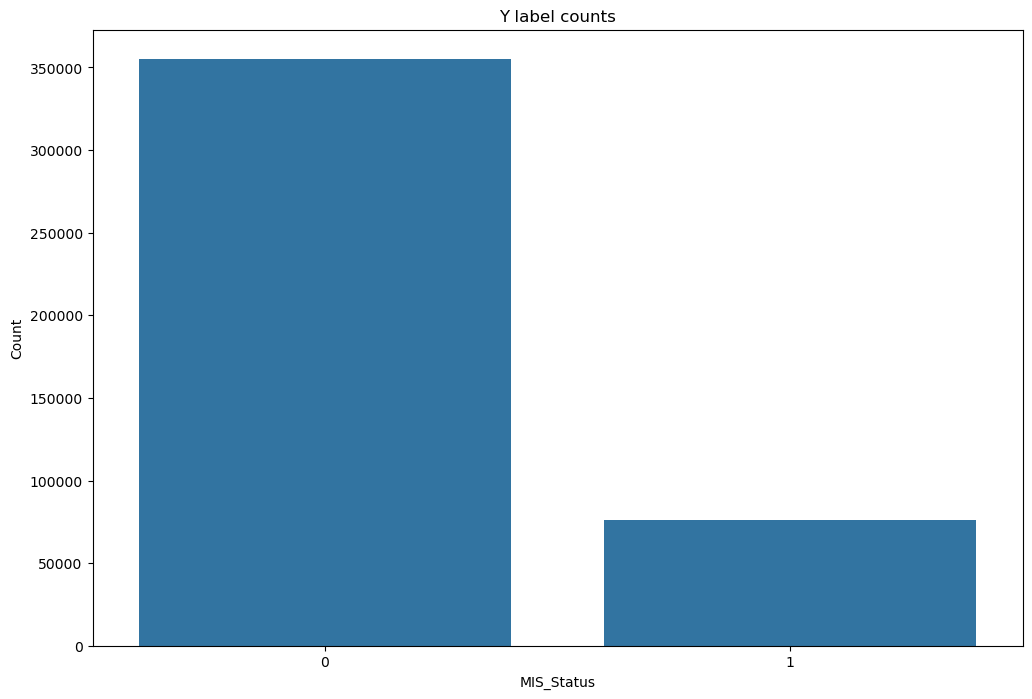

MIS_Status
0    355093
1     75863
Name: count, dtype: int64

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(x="MIS_Status", data=df_train)
plt.xlabel("MIS_Status")
plt.ylabel("Count")
plt.title("Y label counts")
plt.show()
y_train.value_counts()

# Modeling


In [34]:
def pretty_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()

In [35]:
def print_metrics(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"F1 score: {f1_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    pretty_confusion_matrix(y_test, y_pred)

## Baseline model (Decision Tree)


In [36]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 0.92069724055356
F1 score: 0.7738336311296407
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    118402
           1       0.78      0.77      0.77     25250

    accuracy                           0.92    143652
   macro avg       0.86      0.86      0.86    143652
weighted avg       0.92      0.92      0.92    143652



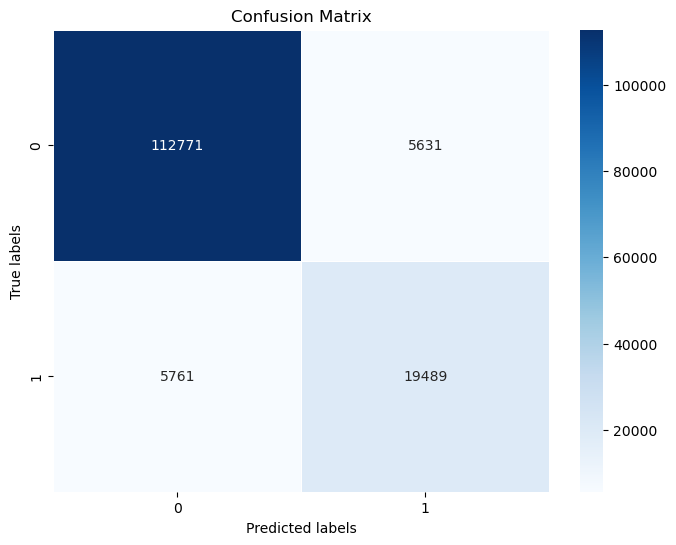

In [37]:
dtc = DecisionTreeClassifier(random_state=101)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print_metrics(y_test, y_pred)

In [38]:
feat_importance_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Importance": dtc.feature_importances_,
}).sort_values("Importance", ascending=False)

In [39]:
top_features = feat_importance_df.head(20)
top_features

,Variable,Importance
2,Term,0.567097
55,NoEmp,0.043344
1,UrbanRural: undefined,0.033051
54,RetainedJob,0.029396
134,Bank: other bank,0.020132
53,RevLineCr: yes,0.018191
83,CreateJob,0.015185
167,"Bank: SUPERIOR FINANCIAL GROUP, LLC",0.011309
56,NewExist: new,0.010878
130,BankState: CA,0.008133


<Axes: xlabel='Importance', ylabel='Variable'>

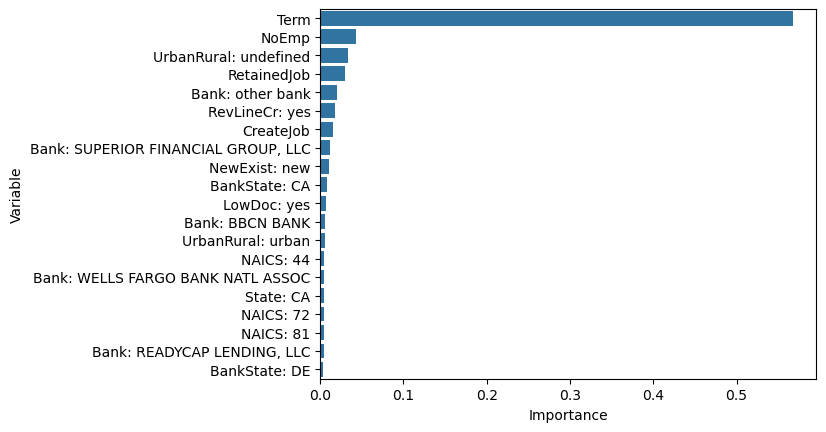

In [40]:
sns.barplot(data=top_features, x="Importance", y="Variable")

## Logistic Regression


In [41]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.8723790827833932
F1 score: 0.5193361474528724
              precision    recall  f1-score   support

           0       0.88      0.97      0.93    118402
           1       0.77      0.39      0.52     25250

    accuracy                           0.87    143652
   macro avg       0.83      0.68      0.72    143652
weighted avg       0.86      0.87      0.85    143652



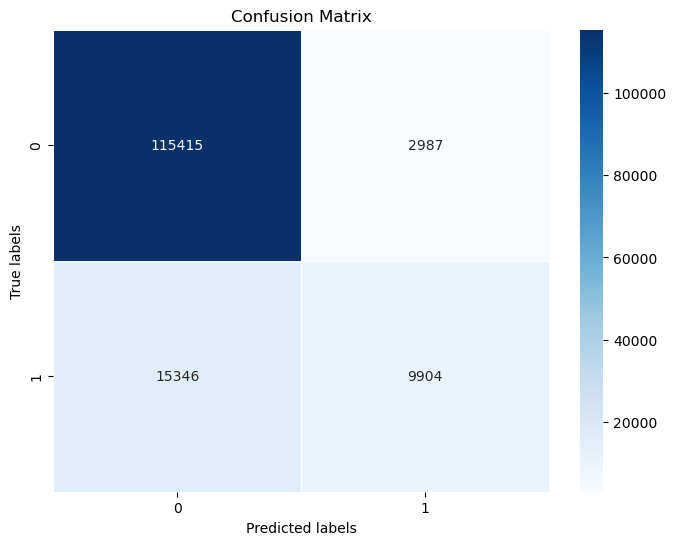

In [42]:
lrc = LogisticRegression(n_jobs=-1, random_state=101, solver="newton-cholesky")
lrc.fit(X_train, y_train)
y_pred = lrc.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.7430526550274273
F1 score: 0.5305317782328327
              precision    recall  f1-score   support

           0       0.95      0.73      0.82    118402
           1       0.39      0.83      0.53     25250

    accuracy                           0.74    143652
   macro avg       0.67      0.78      0.68    143652
weighted avg       0.85      0.74      0.77    143652



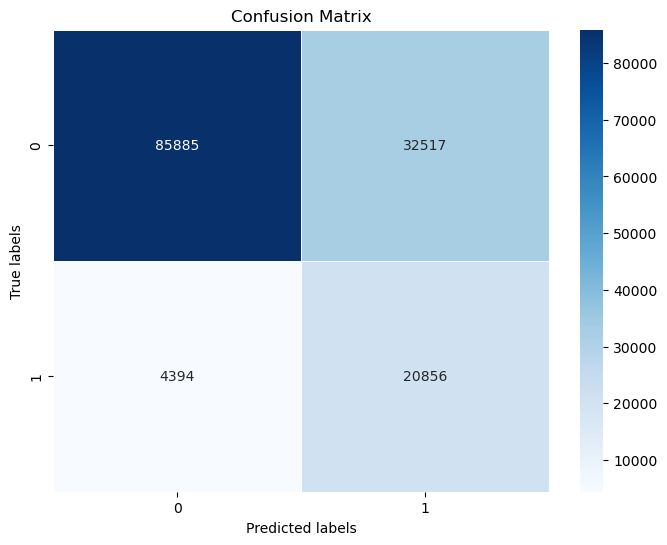

In [43]:
lrc_balanced = LogisticRegression(
    n_jobs=-1, random_state=101, solver="newton-cholesky", class_weight="balanced"
)
lrc_balanced.fit(X_train, y_train)
y_pred = lrc_balanced.predict(X_test)
print_metrics(y_test, y_pred)

## Naive Bayes


In [44]:
from sklearn.naive_bayes import GaussianNB

Accuracy: 0.36722078356027066
F1 score: 0.33686422130788757
              precision    recall  f1-score   support

           0       0.93      0.25      0.39    118402
           1       0.21      0.91      0.34     25250

    accuracy                           0.37    143652
   macro avg       0.57      0.58      0.37    143652
weighted avg       0.80      0.37      0.38    143652



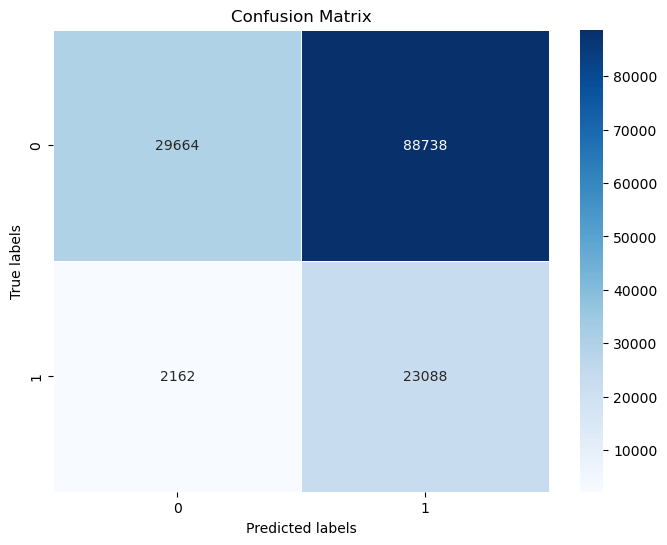

In [45]:
gnbc = GaussianNB()
gnbc.fit(X_train, y_train)
y_pred = gnbc.predict(X_test)
print_metrics(y_test, y_pred)

## уменьшение размерности с помощью PCA

In [46]:
from sklearn.decomposition import PCA

In [47]:
# reduce the number of features to 30 using PCA
pca = PCA(n_components=30, random_state=101)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Logistic Regression with PCA

Accuracy: 0.8548575724667947
F1 score: 0.3974685007513582
              precision    recall  f1-score   support

           0       0.86      0.98      0.92    118402
           1       0.74      0.27      0.40     25250

    accuracy                           0.85    143652
   macro avg       0.80      0.63      0.66    143652
weighted avg       0.84      0.85      0.83    143652



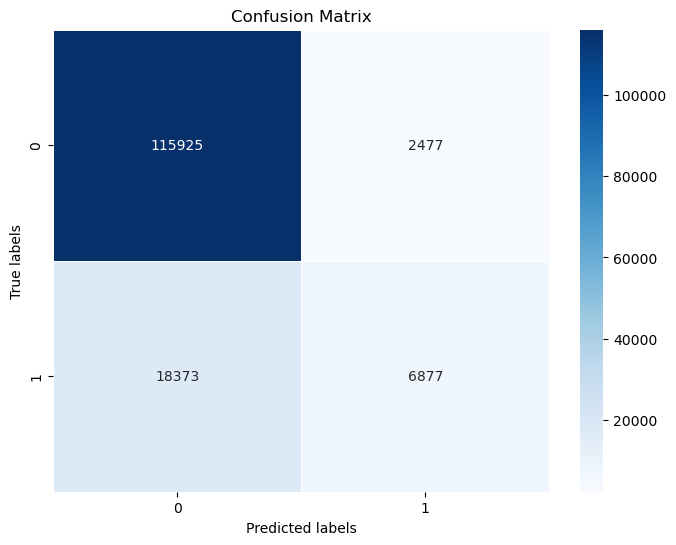

In [62]:
lrc_pca = LogisticRegression(n_jobs=-1, random_state=101, solver="newton-cholesky")
lrc_pca.fit(X_train_pca, y_train)
y_pred = lrc_pca.predict(X_test_pca)
print_metrics(y_test, y_pred)

## K-nearest neighbors with PCA


In [49]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.9217205468771754
F1 score: 0.7608210145698182
              precision    recall  f1-score   support

           0       0.94      0.97      0.95    118402
           1       0.82      0.71      0.76     25250

    accuracy                           0.92    143652
   macro avg       0.88      0.84      0.86    143652
weighted avg       0.92      0.92      0.92    143652



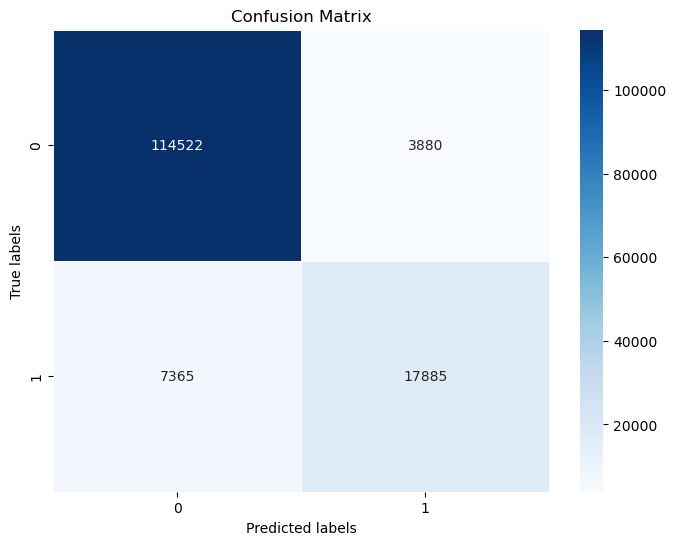

In [50]:
knnc = KNeighborsClassifier(n_jobs=-1)
knnc.fit(X_train_pca, y_train)
y_pred = knnc.predict(X_test_pca)
print_metrics(y_test, y_pred)

## Support Vector Machine with PCA


In [51]:
from sklearn.svm import LinearSVC

Accuracy: 0.6760574165344025
F1 score: 0.4755024063658803
              precision    recall  f1-score   support

           0       0.95      0.64      0.77    118402
           1       0.33      0.84      0.48     25250

    accuracy                           0.68    143652
   macro avg       0.64      0.74      0.62    143652
weighted avg       0.84      0.68      0.71    143652



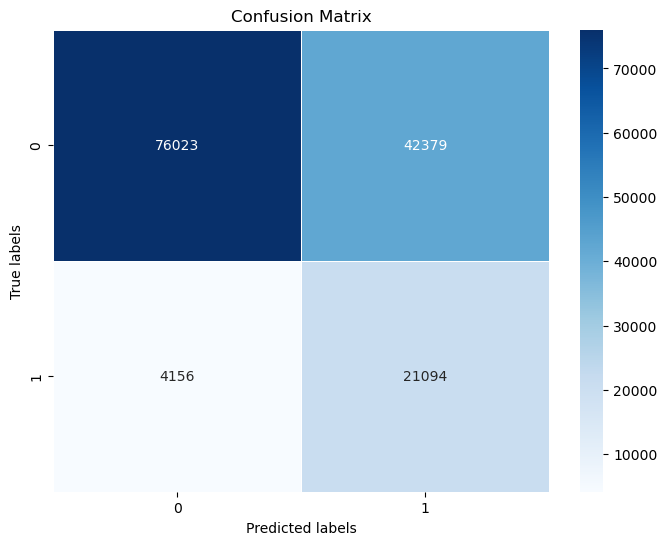

In [52]:
svmc = LinearSVC(random_state=101, class_weight="balanced", dual="auto")
svmc.fit(X_train_pca, y_train)
y_pred = svmc.predict(X_test_pca)
print_metrics(y_test, y_pred)

## MLP with PCA

In [53]:
from sklearn.neural_network import MLPClassifier

Accuracy: 0.9067955893409072
F1 score: 0.7133528870239141
              precision    recall  f1-score   support

           0       0.93      0.96      0.94    118402
           1       0.78      0.66      0.71     25250

    accuracy                           0.91    143652
   macro avg       0.85      0.81      0.83    143652
weighted avg       0.90      0.91      0.90    143652



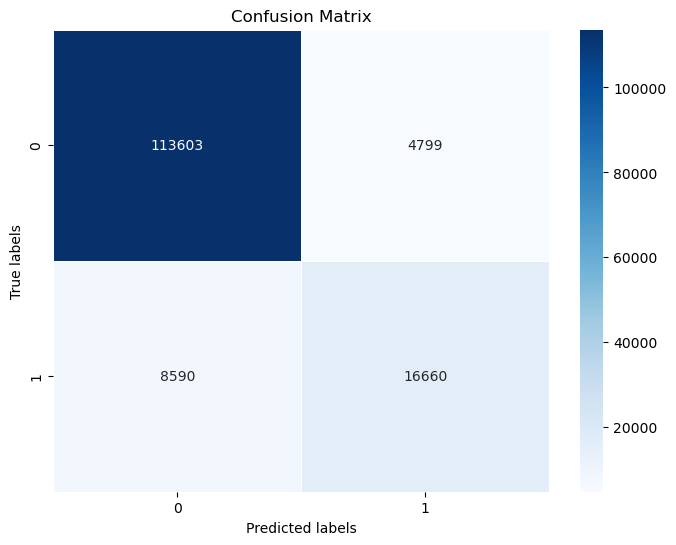

In [54]:
mlpc = MLPClassifier(hidden_layer_sizes=(100,), random_state=101)
mlpc.fit(X_train_pca, y_train)
y_pred = mlpc.predict(X_test_pca)
print_metrics(y_test, y_pred)

## Итоги

Топ моделей (по precision)
Модель | Accuracy | Precision | Recall | F1 Score
--- | --- | ---  | ---  | --- 
KNN with PCA | 0.92 | 0.82 | 0.71 | 0.76
Decision Tree | 0.92 | 0.78 | 0.77 | 0.77
MLP with PCA | 0.90 | 0.78 | 0.66 | 0.71
Logistic Regression | 0.87 | 0.77 | 0.39 | 0.52
SVM with PCA | 0.67 | 0.33 | 0.84 | 0.47
Naive Bayes | 0.36 | 0.21 | 0.91 | 0.33

# Validation


In [55]:
validation_df

,UrbanRural: urban,UrbanRural: undefined,Term,State: WY,State: WV,State: WI,State: WA,State: VT,State: VA,State: UT,...,Bank: BANCO POPULAR NORTH AMERICA,Bank: BANCFIRST,Bank: AURORA BANK FSB,Bank: ASSOCIATED BANK NATL ASSOC,Bank: ARVEST BANK,Bank: ANCHOR BANK NATL ASSOC,Bank: AMERICANWEST BANK,Bank: AMER NATL BK OF TEXAS,Bank: AMEGY BK NATL ASSOC,Bank: ALABAMA COMMUN DEVEL CORP
115185,False,True,70,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
606104,True,False,84,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
107034,True,False,42,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
373919,True,False,120,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
506432,False,True,180,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168500,False,True,291,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
808277,True,False,300,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
626810,True,False,120,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37779,True,False,84,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
X_validation = validation_df.drop("MIS_Status", axis=1)
y_validation = validation_df["MIS_Status"]
X_validation_pca = pca.transform(X_validation)

## K nearest neighbors with PCA (лучшая модель среди рассмотренных)

Accuracy: 0.9205733585430099
F1 score: 0.7580843628488457
              precision    recall  f1-score   support

           0       0.94      0.97      0.95    254825
           1       0.82      0.71      0.76     54580

    accuracy                           0.92    309405
   macro avg       0.88      0.84      0.86    309405
weighted avg       0.92      0.92      0.92    309405



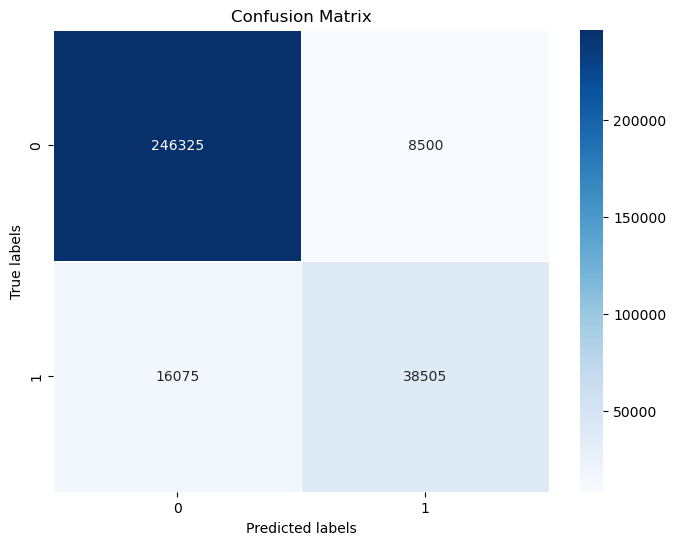

In [59]:
y_pred = knnc.predict(X_validation_pca)
print_metrics(y_validation, y_pred)

## Decision Tree (для сравнения)

Accuracy: 0.9224188361532619
F1 score: 0.7792897993710808
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    254825
           1       0.78      0.78      0.78     54580

    accuracy                           0.92    309405
   macro avg       0.87      0.87      0.87    309405
weighted avg       0.92      0.92      0.92    309405



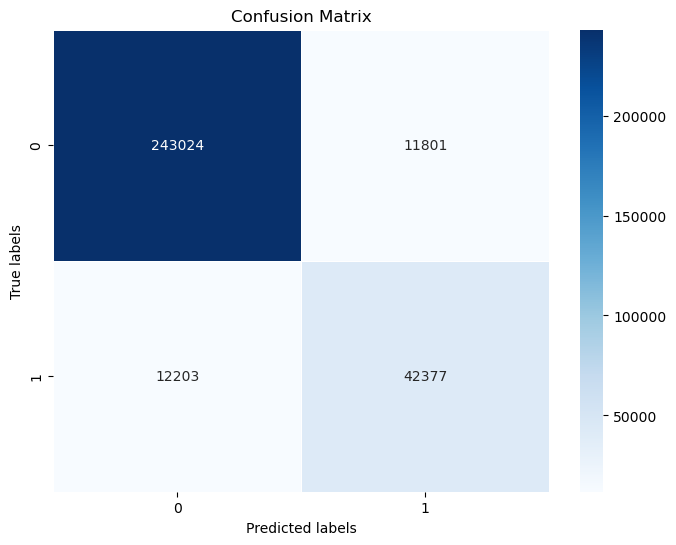

In [61]:
y_pred = dtc.predict(X_validation)
print_metrics(y_validation, y_pred)